In [23]:
import numpy as np
import pandas as pd
import pathlib
import dotenv
import os
import matplotlib.pyplot as plt

from preference_learning import load_dataframe, UtaWrapper

In [10]:
dotenv.load_dotenv()
X_train, X_test, y_train, y_test = load_dataframe(mode="split", all_gain=True)
model = UtaWrapper()
path = pathlib.Path(os.getenv("PROJECT_PATH")) / "models" / "ann_utadis.pt"
model.load_model(path)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Now, get the indices ordered by the difference
idx = np.argsort(abs(y_pred_proba[:, 1] - 0.5))
idx

array([170, 151, 123,  38, 141, 294,  34, 224, 192,  49, 262,  57, 331,
        84,  13, 310, 297, 194, 295, 312, 135, 175, 319,  87, 173,  50,
        89,  21, 239, 234,  12, 267, 105, 344,  91,  36, 258,  65,  19,
       203, 178,  88, 265, 241,  42, 264, 240,   7, 130, 109, 134, 274,
        37,  80,  10,  75,  45, 116, 188, 293, 280, 289, 161, 184,  51,
       207, 122, 311,   9, 143, 137, 210, 333,  94,  41, 288, 191, 111,
       220,  22,   4, 332, 132,  64,  68,  25,  52, 317, 246, 281,  43,
       214, 176, 119, 284,  85,  92, 174, 343,  76, 212, 230,  17,   8,
       330,  93, 292, 225, 179, 201, 117, 206, 231, 341, 247, 136, 302,
       316, 219, 168, 112, 115, 237, 335,   6,  26, 180, 308, 266, 248,
       326, 251,  99, 278, 227, 114, 320,  82,  16, 148, 177, 218, 106,
       322, 163, 107, 321,  23, 121, 300, 146,   2, 169, 200, 282, 172,
       125, 287,  95,  11, 182,  96, 296,  67, 159, 126,  70,  35, 113,
        28,   3, 283,  46, 254, 145, 271, 306,  29, 124, 256,  1

In [11]:
y_pred_proba[idx]

array([[0.4995888 , 0.5004112 ],
       [0.49793124, 0.50206876],
       [0.50217915, 0.49782085],
       [0.50224245, 0.49775752],
       [0.50240827, 0.49759176],
       [0.50274503, 0.49725497],
       [0.5027492 , 0.4972508 ],
       [0.5031147 , 0.49688533],
       [0.503398  , 0.496602  ],
       [0.50346184, 0.49653816],
       [0.5042821 , 0.49571785],
       [0.49536067, 0.5046393 ],
       [0.50497025, 0.49502975],
       [0.5084957 , 0.49150428],
       [0.49006748, 0.5099325 ],
       [0.5100838 , 0.4899162 ],
       [0.5108446 , 0.48915538],
       [0.48915195, 0.51084805],
       [0.5109556 , 0.4890444 ],
       [0.510985  , 0.48901498],
       [0.51170385, 0.48829618],
       [0.51174057, 0.48825946],
       [0.5118501 , 0.4881499 ],
       [0.51204824, 0.48795176],
       [0.5123522 , 0.48764774],
       [0.512389  , 0.487611  ],
       [0.51265556, 0.48734444],
       [0.5129199 , 0.48708007],
       [0.5135499 , 0.48645008],
       [0.5137789 , 0.48622108],
       [0.

In [12]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [13]:
X_test.iloc[idx[:3]]

,buying,maint,doors,persons,lug_boot,safety
170,1.000000,0.000000,1.000000,0.5,1.0,1.0
151,1.000000,0.666667,1.000000,0.5,1.0,1.0
123,0.333333,1.000000,0.333333,1.0,1.0,0.5


In [14]:
y_test.iloc[idx[:3]]

,class
170,0
151,1
123,0


In [15]:
y_pred_proba[idx[:3]]

array([[0.4995888 , 0.5004112 ],
       [0.49793124, 0.50206876],
       [0.50217915, 0.49782085]], dtype=float32)

In [16]:
y_pred[idx[:3]]

array([[1],
       [1],
       [0]])

In [22]:
print(model.predict(pd.Series([2/3,0,1,0.5,1,1]))) # buying 1 -> 2/3 then 1 -> 0
print(model.predict(pd.Series([2/3,2/3,1,0.5,1,1]))) # buying 1 -> 2/3 then 1 -> 0
print(model.predict(pd.Series([1,1,1/3,1,1,0.5]))) # buying 1/3 -> 1 then 0 -> 1

[[0]]
[[0]]
[[1]]


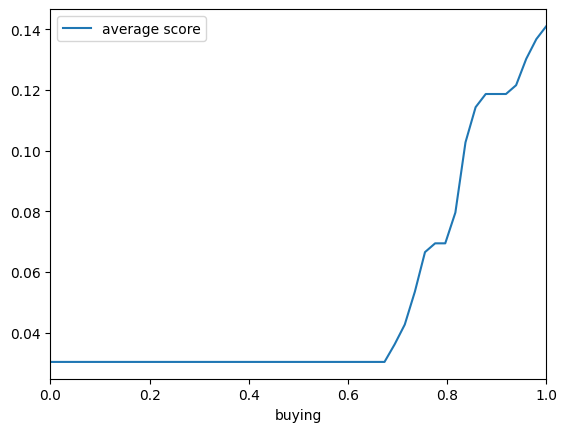

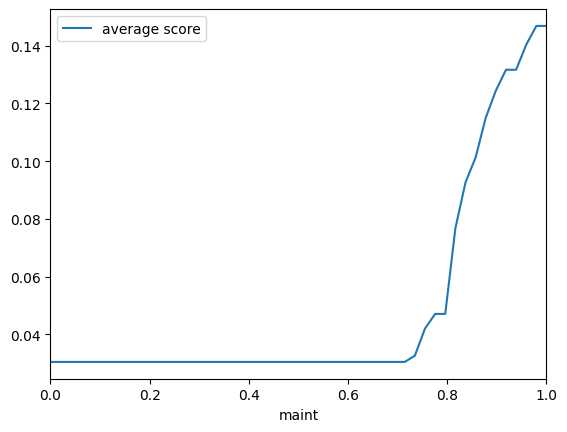

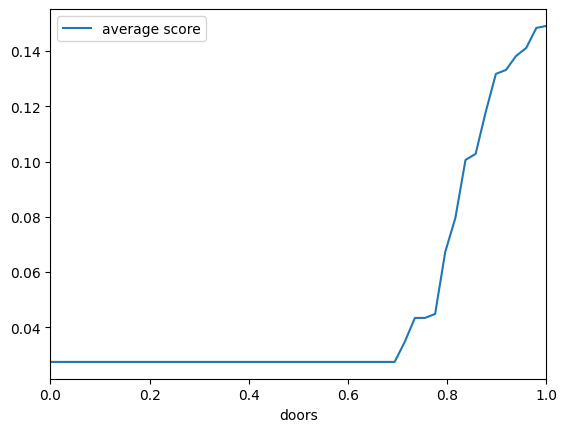

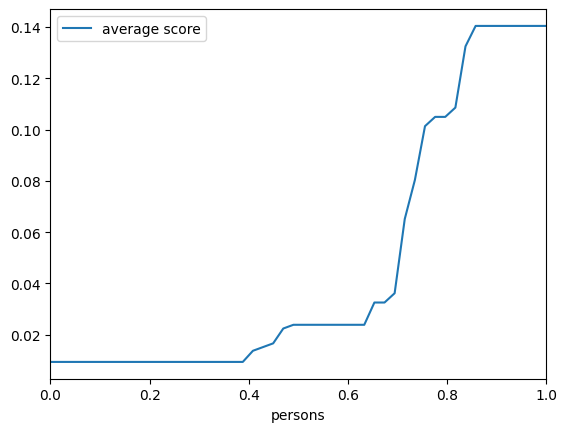

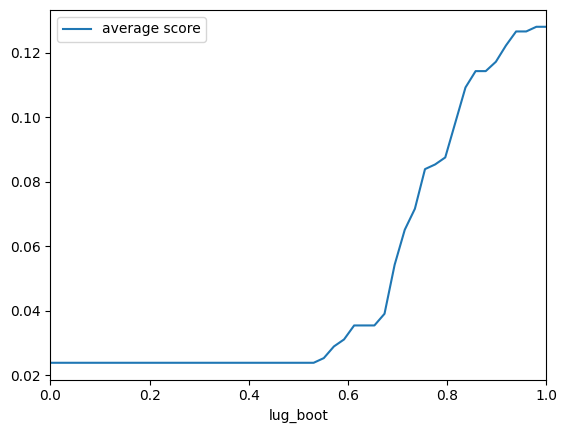

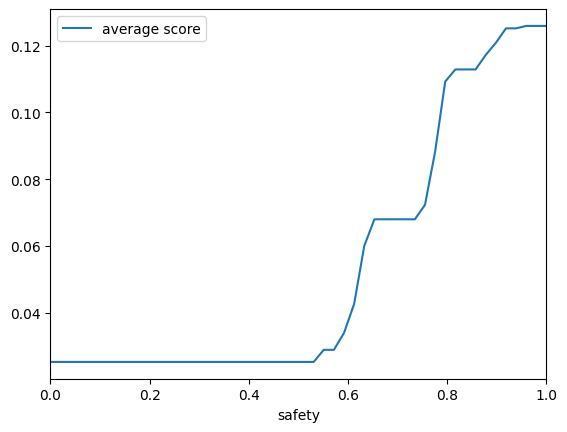

In [25]:
grid = np.linspace(0,1,50)
criteria_nr = len(X_train.columns)
for c in range(criteria_nr):
    y_pred = np.zeros(len(grid))
    for i, val in enumerate(grid):
        X_temp = X_train.values.copy()
        X_temp[:, c] = val
        y_pred[i] = np.average(model.predict(pd.DataFrame(X_temp)))

    fig, ax = plt.subplots()
    ax.plot(grid, y_pred,  label='average score')
    ax.set_xlim(0, 1)
    ax.set_xlabel(X_train.columns[c])
    ax.legend()
    # Save the figure
    fig.savefig(f'../plots/feature_{c}_UTADIS.png')